In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
price_2 = pd.read_csv("data/prices_day_-2.csv", sep=";")
price_1 = pd.read_csv("data/prices_day_-1.csv", sep=";")
price_0 = pd.read_csv("data/prices_day_0.csv", sep=";")

prices = [price_2, price_1, price_0]

In [3]:
prices_all = prices[0]
# for p in prices[1:]:
#     prices_all = pd.concat((prices_all, p), ignore_index=True)

prices_am = prices_all.loc[prices_all["product"]=="AMETHYSTS"].reset_index().drop("index", axis=1)
prices_st = prices_all.loc[prices_all["product"]=="STARFRUIT"].reset_index().drop("index", axis=1)

<Axes: >

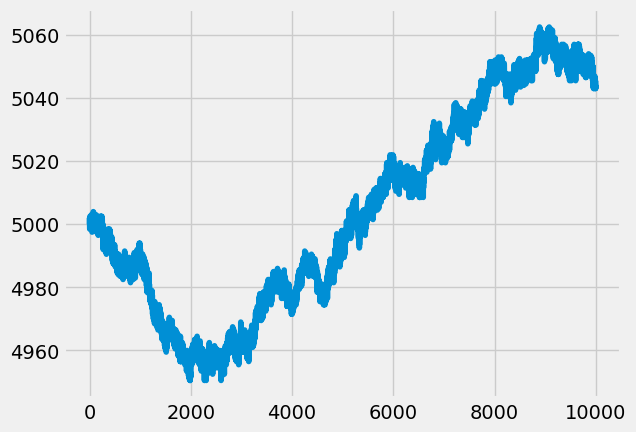

In [4]:
prices_st["mid_price"].plot()

##### Bollinger bands

In [5]:
def bollinger(df, period=20, mult=2):
    bollinger = pd.DataFrame()
    SMA = df.rolling(window=period).mean()
    SMSD = df.rolling(window=period).std()
    bollinger["SMA"] = SMA
    bollinger["upper"] = SMA + mult * SMSD
    bollinger["lower"] = SMA - mult * SMSD

    return bollinger


In [56]:
midprice = prices_st["mid_price"]
sma_delayed = bollinger(midprice, 1)["SMA"]
sma20 = bollinger(midprice, 20, 2.5)["SMA"]
upper = bollinger(midprice, 20, 2.5)["upper"]
lower = bollinger(midprice, 20, 2.5)["lower"]

In [57]:
buy = []
sell = []
threshold = 0.5
long = False
count = 0
hits = 3

for i in range(len(sma_delayed)):
    if long:
        if midprice.iloc[i].item() >= upper.iloc[i].item():
            count += 1

        if count >= hits:
            sell.append(i)
            count = 0
            long = False
            continue

    if np.abs(sma_delayed.iloc[i].item() - lower.iloc[i].item()) < threshold and not long:
        buy.append(i)
        long = True
    
    

In [58]:
print("average buy price: ", midprice.to_numpy().reshape(len(midprice))[buy].mean(),
      "\naverage sell price: ", midprice.to_numpy().reshape(len(midprice))[sell].mean())

average buy price:  5002.632352941177 
average sell price:  5007.924242424242


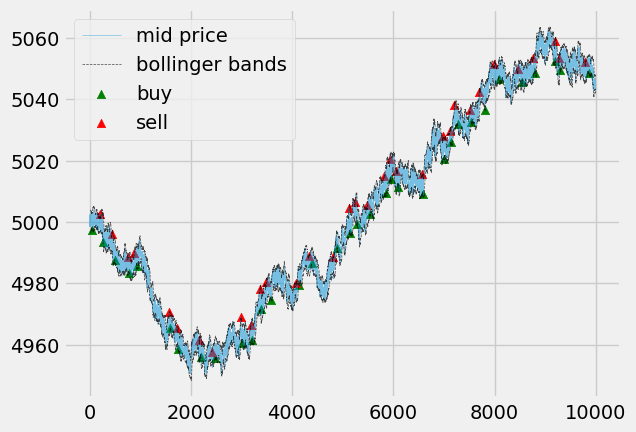

In [59]:
lb, ub = 0, 3000

plt.plot(midprice, lw=0.5, label="mid price", alpha=0.5)
# plt.plot(sma20, label="SMA 20", lw=1.5, ls='dashed')
# plt.plot(sma_delayed, color='r', label="SMA", lw=1, ls='dashed')
plt.plot(upper, lw=0.5, ls='dashed', color='k', label="bollinger bands", alpha=0.7)
plt.plot(lower, lw=0.5, ls='dashed', color='k', alpha=0.7)

plt.scatter(buy, midprice.to_numpy().reshape(len(midprice))[buy], marker="^", color='g', label="buy")
plt.scatter(sell, midprice.to_numpy().reshape(len(midprice))[sell], marker="^", color='r', label="sell")

# plt.xlim((lb, ub))
# plt.ylim((4950, 5010))

plt.legend()
plt.show()

In [ ]:
# self.st_hist = [4899, 4899.5, 4898.5, 4900, 4902.5, 4899.5, 
#                     4899.5, 4901, 4898.5, 4901.5, 4901, 4900.5, 
#                     4900, 4899.5, 4901.5, 4898.5, 4903.5, 4900.5, 
#                     4900.5, 4903, 4900.5, 4899.5, 4900, 4903, 4900.5, 
#                     4899.5, 4901, 4901, 4898.5, 4903.5, 4901, 4901,
#    4900.5, 4901.5, 4901. , 4901. , 4899.5, 4900. , 4901. , 4899.5,
#    4900.5, 4902.5, 4900. , 4899. , 4899.5, 4900. , 4899. , 4896.5,
#    4899. , 4899.5, 4899.5, 4899.5, 4899.5, 4899.5, 4899.5, 4899.5,
#    4901.5, 4899. , 4902.5, 4901. , 4900.5, 4900. , 4899. , 4897.5,
#    4899. , 4899.5, 4899.5, 4899.5, 4897. , 4898.5, 4898. , 4901. ,
#    4898.5, 4896.5, 4897.5, 4896.5, 4897.5, 4896.5, 4896.5, 4896.5,
#    4895.5, 4895.5, 4891.5, 4895. , 4894.5, 4892.5, 4895.5, 4898. ,
#    4894.5, 4896. , 4896. , 4895.5, 4896. , 4896. , 4895.5, 4897.5,
#    4895. , 4897. , 4894. , 4896.5, 4896.5, 4896.5, 4896.5, 4897. ,
#    4899.5, 4897. , 4896.5, 4898. , 4897.5, 4897.5, 4901. , 4901.5,
#    4899. , 4898.5, 4899. , 4901. , 4900.5, 4900.5, 4900.5, 4898. ,
#   4900.5, 4900.5, 4901. , 4900.5, 4901. , 4900.5, 4900.5, 4900. ,å
#    4900.5, 4902. , 4902. , 4901. , 4900.5, 4901. , 4901. , 4899.5,
#    4901.5, 4901.5, 4902. , 4901.5, 4901.5, 4898.5, 4902. , 4904. ,
#    4903. , 4902. , 4901.5, 4902.5, 4902.5, 4902.5, 4902.5, 4903. ,
#    4902.5, 4903. , 4903. , 4903.5, 4905. , 4904.5, 4904.5, 4906. ,
#    4905. , 4906. , 4905.5, 4906. , 4906. , 4906. , 4906.5, 4902.5,
#    4905. , 4903. , 4905. , 4905. , 4904.5, 4904.5, 4904.5, 4905.5,
#    4906.5, 4908. , 4908. , 4904.5, 4908. , 4908. , 4908. , 4907.5,
#    4907.5, 4907.5, 4908. , 4909. , 4909.5, 4911. , 4907.5, 4906.5,
#    4907.5, 4907. , 4907. , 4907. , 4906.5, 4906.5, 4908. , 4909. ]

In [ ]:
## old version of algorithm submitted to Prosperity server
# def compute_orders_amth(self, order_depth, mybid, myask):
#     orders: list[Order] = []
#     lim = self.pos_limit["AMETHYSTS"]

#     sellorders = sorted(list(order_depth.sell_orders.items()))
#     buyorders = sorted(list(order_depth.buy_orders.items()), reverse=True)

#     maxsell, maxbuy = len(sellorders), len(buyorders)

#     for i in range(min(maxsell, maxbuy)):
#         best_ask, best_ask_amount = sellorders[i]
#         best_bid, best_bid_amount = buyorders[i]
        
#         if self.pos["AMETHYSTS"] < lim and \
#             best_ask - mybid < 3 and not np.isnan(best_ask):
#             mybuyvol = min(-best_ask_amount, lim-self.pos["AMETHYSTS"])
#             assert(mybuyvol >= 0), "Buy volume negative"
#             self.pos["AMETHYSTS"] += mybuyvol
#             orders.append(Order("AMETHYSTS", min(best_ask, mybid), mybuyvol))

#         if self.pos["AMETHYSTS"] > -lim and \
#             myask - best_bid < 3 and not np.isnan(best_bid):
#             mysellvol = min(best_bid_amount, self.pos["AMETHYSTS"]+lim)
#             mysellvol *= -1
#             assert(mysellvol <= 0), "Sell volume positive"
#             self.pos["AMETHYSTS"] += mysellvol
#             orders.append(Order("AMETHYSTS", max(best_bid, myask), mysellvol))

#     for j in range(i, max(maxsell, maxbuy)):
#         if maxsell > maxbuy:
#             best_ask, best_ask_amount = sellorders[j]
#             if self.pos["AMETHYSTS"] < lim and \
#                 best_ask - mybid < 3 and not np.isnan(best_ask):
#                 mybuyvol = min(-best_ask_amount, lim-self.pos["AMETHYSTS"])
#                 assert(mybuyvol >= 0), "Buy volume negative"
#                 self.pos["AMETHYSTS"] += mybuyvol
#                 orders.append(Order("AMETHYSTS", min(best_ask, mybid), mybuyvol))
#         elif maxbuy > maxsell:
#             best_bid, best_bid_amount = buyorders[j]
#             if self.pos["AMETHYSTS"] > -lim and myask - best_bid < 3 and not np.isnan(best_bid):
#                 mysellvol = min(best_bid_amount, self.pos["AMETHYSTS"]+lim)
#                 mysellvol *= -1
#                 assert(mysellvol <= 0), "Sell volume positive"
#                 self.pos["AMETHYSTS"] += mysellvol
#                 orders.append(Order("AMETHYSTS", max(best_bid, myask), mysellvol))

#     return orders